## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2020.

## Assignment 2 - Task 1: Optimization

In this task, we introduce several improved stochastic gradient descent (SGD) based optimization methods. Plain/naive SGD is a reasonable method to update neural network parameters. However, to make SGD perform well, one would need to find an appropriate learning rate and a good initial value. Otherwise, the network will get stuck if the learning rate is small, or it will diverge if the learning rate is too large. In reality, since we have no prior knowledge about the training data, it is not trivial to find a good learning rate manually. Also, when the network becomes deeper, for each layer one may need to set a different learning rate. Another common problem is the lack of sufficient training data. This can cause the training to get stuck when using the naive SGD method. These are the limitations of the plain SGD, which are motivators for creating and using improved SGD-based methods. 

To address the question of **how to set a good learning rate?**, one can rely on adaptive learning rate methods.  Here, you are going to experiment with **SGD with momentum**, **RMSProp**, **Adam**, **Nadam** and compare them.
All of these optimizers are adaptive learning rate methods. Here are a few useful links: http://ruder.io/optimizing-gradient-descent/.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils.cifar_utils import load_data 

## Load CIFAR 10

Here we use a small dataset with only 2500 samples to simulate the "lack-of-data" situation.

In [2]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
X_val = X_train[:500,:]
y_val = y_train[:500]
X_train = X_train[500:2500,:]
y_train = y_train[500:2500]

mean_image = np.mean(X_train, axis=0).astype(np.float32)
X_train = X_train.astype(np.float32) - mean_image
X_val = X_val.astype(np.float32) - mean_image

# We have vectorized the data for you. That is, we flatten the 32×32×3 images into 1×3072 Numpy arrays.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
Training data shape:  (2000, 3072)
Training labels shape:  (2000,)
Validation data shape:  (500, 3072)
Validation labels shape:  (500,)


## Part 1: Implement Several Optimizers

Instructors provide code snippets for testing student code implementations.

The best anticipated achievable accuracies are around 0.3-0.4.

In [3]:
from utils.neuralnets.mlp import MLP

### Original SGD with learning rate decay (for comparison purposes only)

In [4]:
from utils.optimizers import SGDOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, weight_scale=1e-3, l2_reg=0.0)
optimizer = SGDOptim()
hist_sgd = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=30, batch_size=200, learning_rate=1e-2, learning_decay=0.95, 
                           verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.114, new learning rate = 0.0095
epoch 2: valid acc = 0.116, new learning rate = 0.009025
epoch 3: valid acc = 0.12, new learning rate = 0.00857375
epoch 4: valid acc = 0.122, new learning rate = 0.0081450625
epoch 5: valid acc = 0.122, new learning rate = 0.007737809374999999
epoch 6: valid acc = 0.132, new learning rate = 0.007350918906249998
epoch 7: valid acc = 0.128, new learning rate = 0.006983372960937498
epoch 8: valid acc = 0.136, new learning rate = 0.006634204312890623
epoch 9: valid acc = 0.136, new learning rate = 0.006302494097246091
epoch 10: valid acc = 0.136, new learning rate = 0.005987369392383786
epoch 11: valid acc = 0.138, new learning rate = 0.005688000922764597
epoch 12: valid acc = 0.15, new learning rate = 0.005403600876626367
epoch 13: valid acc = 0.156, new learning rate = 0.005133420832795048
epoch 14: valid acc = 0.162, new learning rate = 0.0048767497911552955
epoch 15: valid acc = 0.162, new learni

### SGD + Momentum

<span style="color:red">__TODO:__</span> Implement SGD + Momentum by editing **SGDmomentumOptim** in __./utils/optimizers.py__

In [5]:
# Verification code for your implemention
# Please don't change anything.

from utils.optimizers import SGDmomentumOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = SGDmomentumOptim(model, momentum=0.8)
hist_sgd_momentum = optimizer.train(model, X_train, y_train, X_val, y_val, 
                                         num_epoch=30, batch_size=200, learning_rate=1e-2, 
                                         learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.12, new learning rate = 0.0095
epoch 2: valid acc = 0.13, new learning rate = 0.009025
epoch 3: valid acc = 0.148, new learning rate = 0.00857375
epoch 4: valid acc = 0.15, new learning rate = 0.0081450625
epoch 5: valid acc = 0.166, new learning rate = 0.007737809374999999
epoch 6: valid acc = 0.17, new learning rate = 0.007350918906249998
epoch 7: valid acc = 0.226, new learning rate = 0.006983372960937498
epoch 8: valid acc = 0.28, new learning rate = 0.006634204312890623
epoch 9: valid acc = 0.264, new learning rate = 0.006302494097246091
epoch 10: valid acc = 0.24, new learning rate = 0.005987369392383786
epoch 11: valid acc = 0.238, new learning rate = 0.005688000922764597
epoch 12: valid acc = 0.258, new learning rate = 0.005403600876626367
epoch 13: valid acc = 0.246, new learning rate = 0.005133420832795048
epoch 14: valid acc = 0.256, new learning rate = 0.0048767497911552955
epoch 15: valid acc = 0.256, new learning r

### RMSprop

<span style="color:red">__TODO:__</span>  Implement RMSprop by editing **RMSpropOptim** in ./utils/optimizers.py

In [6]:
# Verification code for your implemention
# Please don't change anything.

from utils.optimizers import RMSpropOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = RMSpropOptim(model)
hist_rmsprop = optimizer.train(model, X_train, y_train, X_val, y_val, 
                               num_epoch=30, batch_size=200, learning_rate=1e-3, 
                               learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.12, new learning rate = 0.00095
epoch 2: valid acc = 0.188, new learning rate = 0.0009025
epoch 3: valid acc = 0.176, new learning rate = 0.000857375
epoch 4: valid acc = 0.212, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.242, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.26, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.278, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.334, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.328, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.358, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.36, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.328, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.314, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.342, new learning rate = 0.00048767497911552944
epoch 15: valid acc

### Adam

<span style="color:red">__TODO:__</span> Implement Adam by editing **AdamOptim** in ./utils/optimizers.py

In [7]:
# Verification code for your implemention
# Please don't change anything.

from utils.optimizers import AdamOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = AdamOptim(model)
hist_adam = optimizer.train(model, X_train, y_train, X_val, y_val, 
                            num_epoch=30, batch_size=200, learning_rate=1e-3, 
                            learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.108, new learning rate = 0.00095
epoch 2: valid acc = 0.152, new learning rate = 0.0009025
epoch 3: valid acc = 0.162, new learning rate = 0.000857375
epoch 4: valid acc = 0.19, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.224, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.266, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.248, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.26, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.284, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.296, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.302, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.31, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.304, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.302, new learning rate = 0.00048767497911552944
epoch 15: valid acc

### Nadam

<span style="color:red">__TODO:__</span> Implement Nadam by editing **NadamOptim** in ./utils/optimizers.py

In [8]:
# Verification code for your implemention
# Please don't change anything.

from utils.optimizers import NadamOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = NadamOptim(model)
hist_nadam= optimizer.train(model, X_train, y_train, X_val, y_val, 
                            num_epoch=30, batch_size=200, learning_rate=5e-4, 
                            learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.16, new learning rate = 0.000475
epoch 2: valid acc = 0.154, new learning rate = 0.00045125
epoch 3: valid acc = 0.17, new learning rate = 0.0004286875
epoch 4: valid acc = 0.164, new learning rate = 0.00040725312499999993
epoch 5: valid acc = 0.174, new learning rate = 0.0003868904687499999
epoch 6: valid acc = 0.242, new learning rate = 0.0003675459453124999
epoch 7: valid acc = 0.246, new learning rate = 0.00034916864804687486
epoch 8: valid acc = 0.272, new learning rate = 0.0003317102156445311
epoch 9: valid acc = 0.278, new learning rate = 0.0003151247048623045
epoch 10: valid acc = 0.298, new learning rate = 0.00029936846961918924
epoch 11: valid acc = 0.29, new learning rate = 0.00028440004613822977
epoch 12: valid acc = 0.286, new learning rate = 0.00027018004383131826
epoch 13: valid acc = 0.286, new learning rate = 0.00025667104163975234
epoch 14: valid acc = 0.28, new learning rate = 0.00024383748955776472
epoch 15: 

## Part 2: Comparison

<span style="color:red">__TODO:__</span> Run the following cells, which plot the loss curves of different optimizers. 

In [9]:
loss_hist_sgd, train_acc_hist_sgd, val_acc_hist_sgd = hist_sgd
loss_hist_momentum, train_acc_hist_momentum, val_acc_hist_momentum = hist_sgd_momentum
loss_hist_rmsprop, train_acc_hist_rmsprop, val_acc_hist_rmsprop = hist_rmsprop
loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = hist_adam
loss_hist_nadam, train_acc_hist_nadam, val_acc_hist_nadam = hist_nadam

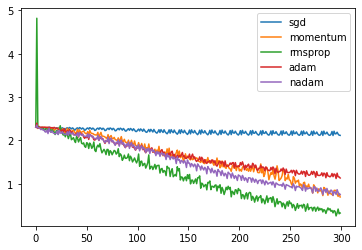

In [10]:
# Plot the training error curves for implemented optimizers
plt.plot(loss_hist_sgd, label="sgd")
plt.plot(loss_hist_momentum, label="momentum")
plt.plot(loss_hist_rmsprop, label="rmsprop")
plt.plot(loss_hist_adam, label="adam")
plt.plot(loss_hist_nadam, label="nadam")
plt.legend()
plt.show()

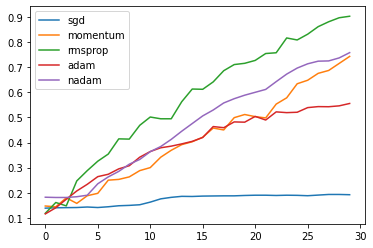

In [11]:
# Plot the training accuracy curves for implemented optimizers
plt.plot(train_acc_hist_sgd, label="sgd")
plt.plot(train_acc_hist_momentum, label="momentum")
plt.plot(train_acc_hist_rmsprop, label="rmsprop")
plt.plot(train_acc_hist_adam, label="adam")
plt.plot(train_acc_hist_nadam, label="nadam")
plt.legend()
plt.show()

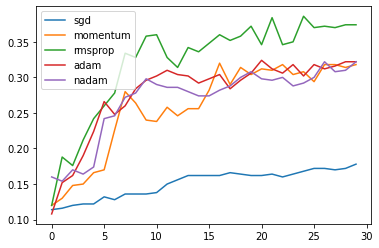

In [12]:
# Plot the validation accuracy curves for implemented optimizers
plt.plot(val_acc_hist_sgd, label="sgd")
plt.plot(val_acc_hist_momentum, label="momentum")
plt.plot(val_acc_hist_rmsprop, label="rmsprop")
plt.plot(val_acc_hist_adam, label="adam")
plt.plot(val_acc_hist_nadam, label="nadam")
plt.legend()
plt.show()

<span style="color:red">__TODO:__</span> Describe your results, and discuss your understandings of these optimizers, such as their advantages/disadvantages and when to use them.

Answer: RMSprop provides the best result comparing the rest optimization algorithm, followed by adam, momentum and nadam. The SGD algorithm is the slowest one due to the property that it does not associate with any velocity parameters. RMSprop updates the learning rate by dividing an exponentially decaying average of the squared gradients which performs better in the nonconvex setting. Adam is a combination of both Momentum and RMSProp, which computes the learning rate adaptively. And it includes bias corrections to the estimates of both the first-order moments and the second-order moments. Nadam combines the Adam and NAG. 